In [16]:
import torch, torchvision
import torchvision.transforms as transforms

# Project 2

### Generative AI
### Jack Bosco
### Working with GANS

---

1. ### Dataset Preparation 

	- Download and load the Fashion-MNIST dataset using `torchvision.datasets.FashionMNIST`
	- Normalize the images to have values between -1 and 1, as this range typically works well with the ReLU activation function used in the generator's layers.
	- Create DataLoader objects for the training dataset to iterate over batches.

In [49]:
# define the transforms to values between -1 and 1
transform = transforms.Compose(
	[
		transforms.ToTensor()
		, transforms.Normalize((.5), (.5), inplace=True) # normalize between -1 and 1
  	]
)

batchsize = 4

# load the training dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batchsize, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batchsize, shuffle=False, num_workers=2)

# define the classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#### Visualize the data

torch.Size([4, 1, 28, 28]) torch.Size([4])
tensor(-1.) tensor(1.)


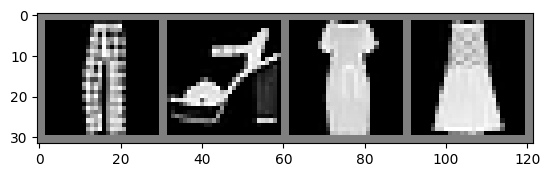

|     Trouser     |     Sandal      |      Dress      |      Dress      |


In [70]:
# print some info about a sample from the data
e = next(iter(trainloader))
print(e[0].shape, e[1].shape)
print(e[0].min(), e[0].max())

# show some images
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
	img = img / 2 + 0.5 # unnormalize
	npimg = img.numpy()
	plt.imshow(np.transpose(npimg, (1, 2, 0)))
	plt.show()

imshow(torchvision.utils.make_grid(e[0]))
s = '|' + r'{:^17s}|' * batchsize
print(s.format(*[classes[e[1][j]] for j in range(batchsize)]))